In [6]:
%load_ext autoreload
%autoreload 2

import os

SEED = 42

head, tail = os.path.split(os.getcwd())
if tail == "notebooks": os.chdir(head)

import src.plots as plots
import src.tools as tools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
X, y = tools.load_data("data/raw/v1_var_desync0.h5")

Wykres outlierów (sigma > 4):

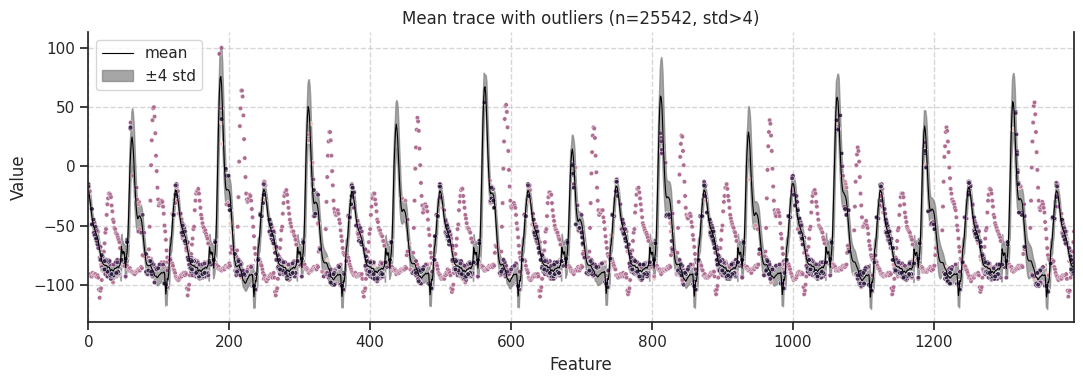

In [8]:
fig = plots.plot_trace_outliers(X, std=4)
fig.savefig("figures/mean_trace_outliers.png", dpi=300)

Pomyślałem, że nie ma sensu narzucać dolnego progu dla odchylenia, więc po prostu posortowałem wartości według ich z-score i top-0.05% (140 tyś.) będę klasyfikował jako anomalie. Najpierw chciałem odrzucać top-0.1%, ale najniższe z-score kręciło się w okolicy ~3 sigma, jednak uznałem, że w tak dużym zbiorze takie wartości mogą się pojawiać.

In [10]:
N_ANOMALIES = int(5e-4 * X.size)

df_z, _ = tools.detect_outliers_std(X, std=3)
df_z.sort_values("Z-score", ascending=False, inplace=True)
df_z = df_z.iloc[:N_ANOMALIES]

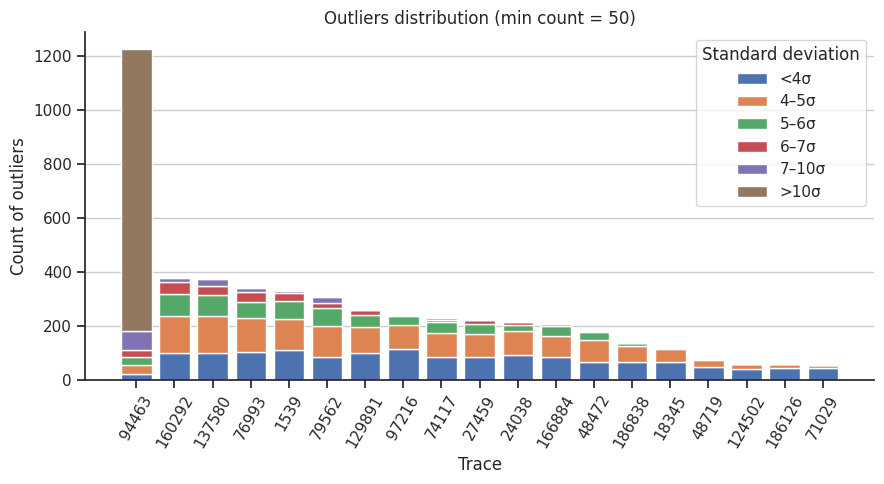

In [ ]:
fig = plots.plot_feature_anomalies(df_z)
fig.savefig("figures/feature_anomalies.png", dpi=300)

Próbka 94463 jest ewidentnie błędna, więc zostanie usunięta. Pozostałe mimo długich "ogonów" wyglądają sensownie.

In [ ]:
tools.save_data(
    "data/processed/v1_var_desync0_clean01.h5",
    X.drop(index=94463),
    y.drop(index=94463),
)

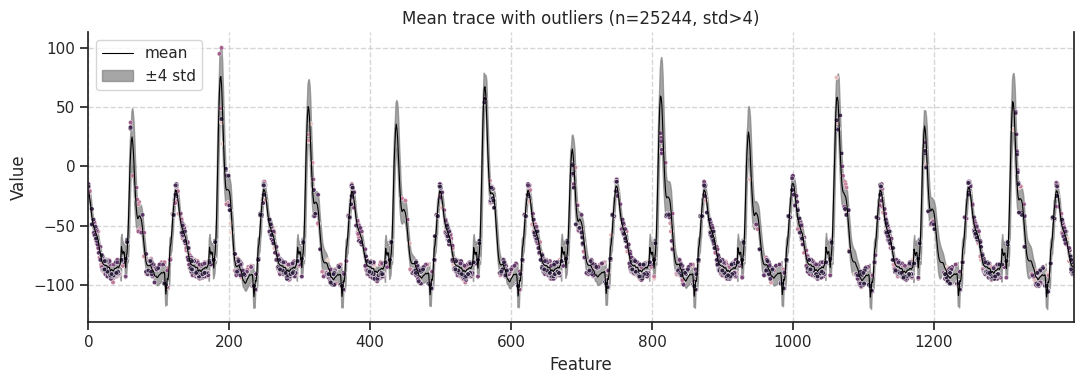

In [ ]:
X, _ = tools.load_data("data/processed/v1_var_desync0_clean01.h5")
fig = plots.plot_trace_outliers(X, std=4)
fig.savefig("figures/mean_trace_outliers.png", dpi=300)